In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn import metrics

In [5]:
#!mkdir data && mv bank_data.csv ./data/.

In [6]:
df = pd.read_csv('./data/bank_data.csv')
df.shape

(10127, 22)

In [7]:
df.head(3)

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [8]:
# Remove the row_number & id:
columns_to_drop = ['Unnamed: 0', 'CLIENTNUM']

df = df.drop(columns_to_drop, axis= 1)
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [9]:
df.shape

(10127, 20)

In [10]:
# Chek out the na:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [12]:
df['Churn'] = (df['Attrition_Flag'] == 'Attrited Customer') * 1.
df['Churn'].value_counts()

Churn
0.0    8500
1.0    1627
Name: count, dtype: int64

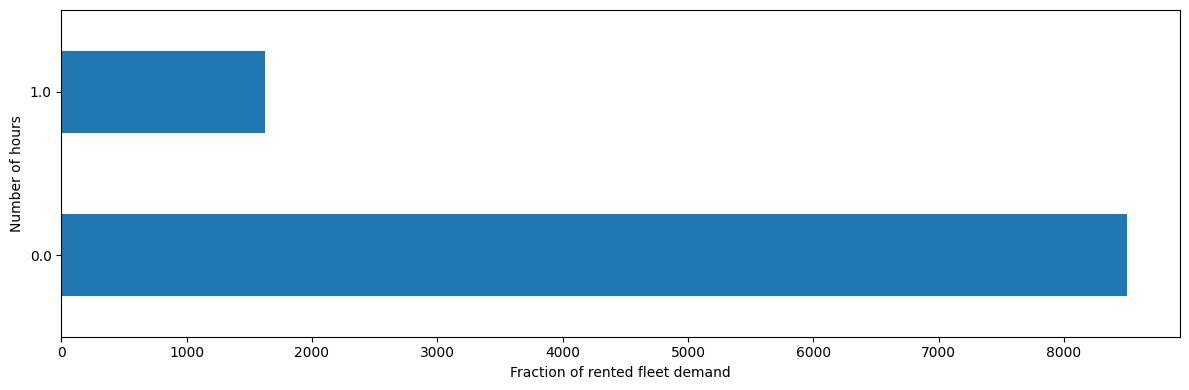

In [13]:
fig, ax = plt.subplots(figsize= (12, 4))
df['Churn'].value_counts().sort_index().plot(kind= 'barh', ax= ax)
_ = ax.set(
    xlabel= 'Fraction of rented fleet demand',
    ylabel= 'Number of hours'
)
plt.tight_layout()

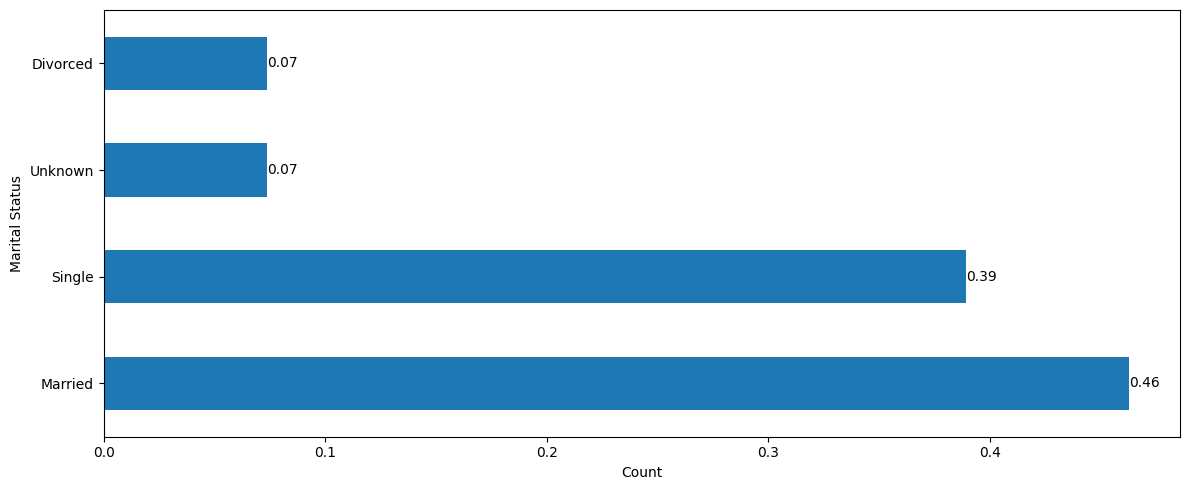

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
marital_status_counts = df['Marital_Status'].value_counts(normalize=True)
marital_status_counts.plot(kind='barh', ax=ax)

# Adding count annotations to the bars
for i, count in enumerate(marital_status_counts):
    ax.text(count, i, f'{count:.2f}', ha='left', va='center', color='black')

ax.set(
    xlabel='Count',
    ylabel='Marital Status'
)
plt.tight_layout()
plt.show()

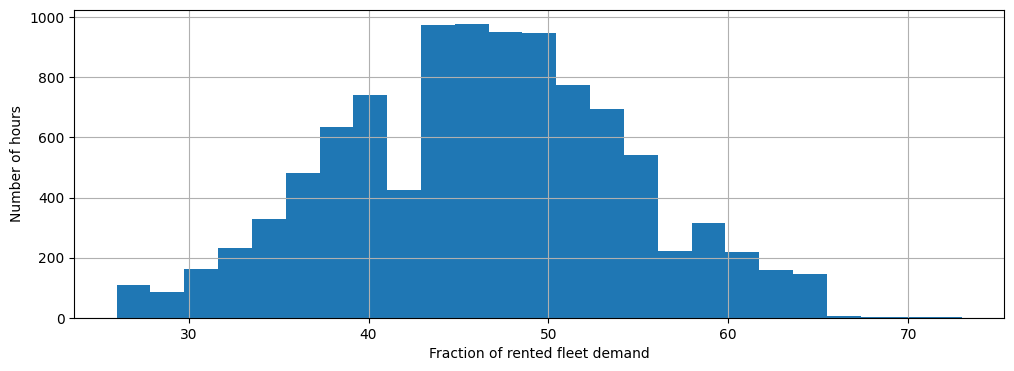

In [15]:
fig, ax = plt.subplots(figsize= (12, 4))
df['Customer_Age'].hist(bins= 25, ax= ax)
_ = ax.set(
    xlabel= 'Fraction of rented fleet demand',
    ylabel= 'Number of hours'
)

In [16]:
df['Customer_Age'].describe().round(1)

count    10127.0
mean        46.3
std          8.0
min         26.0
25%         41.0
50%         46.0
75%         52.0
max         73.0
Name: Customer_Age, dtype: float64

''

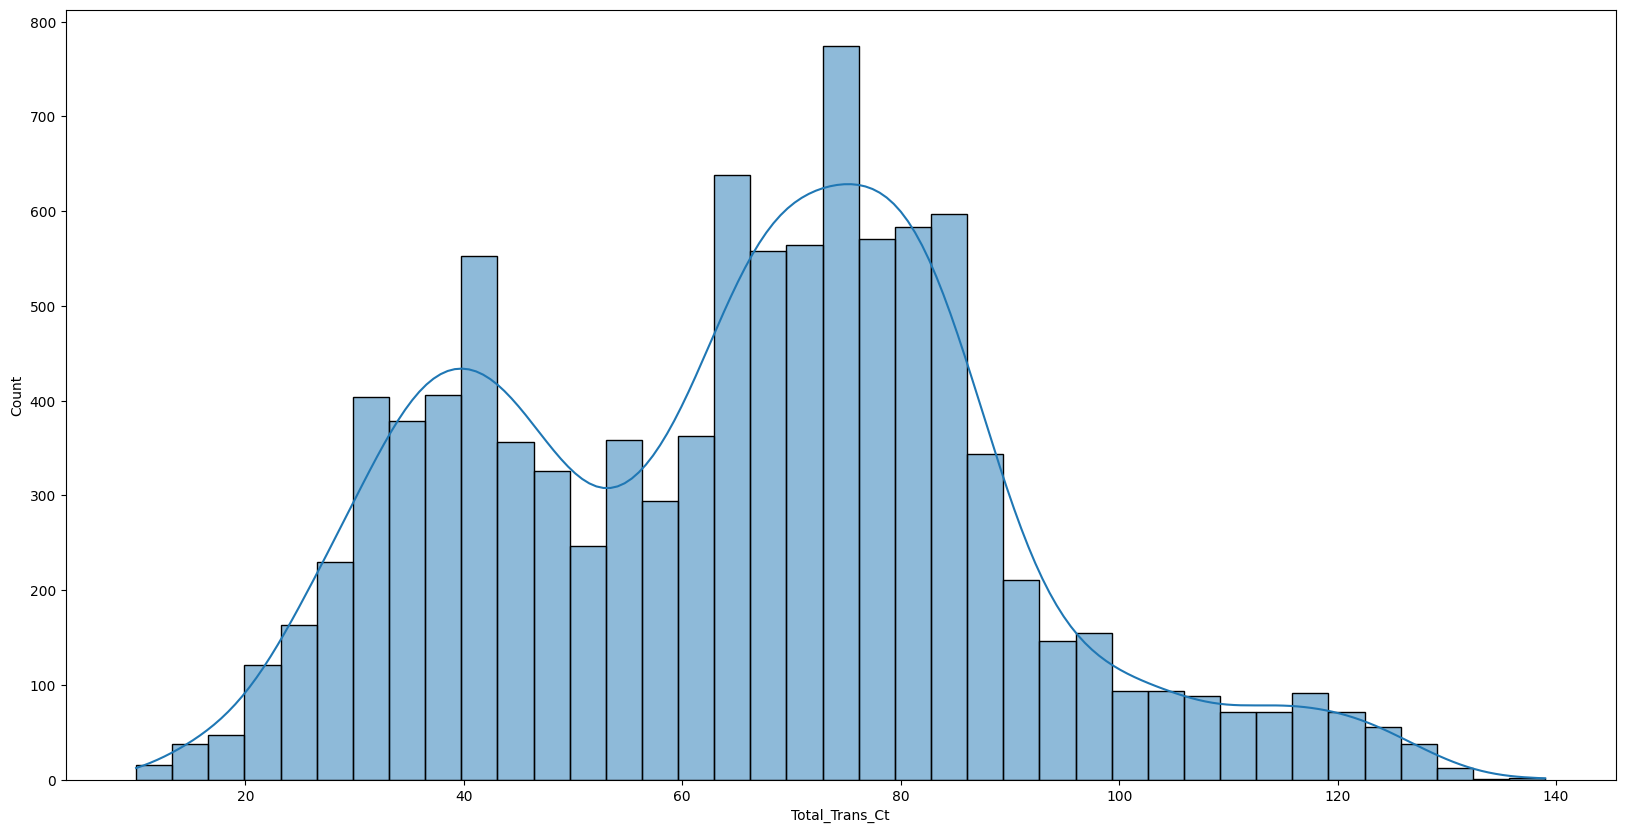

In [17]:
plt.figure(figsize= (20, 10))
sns.histplot(df['Total_Trans_Ct'], kde= True)
;

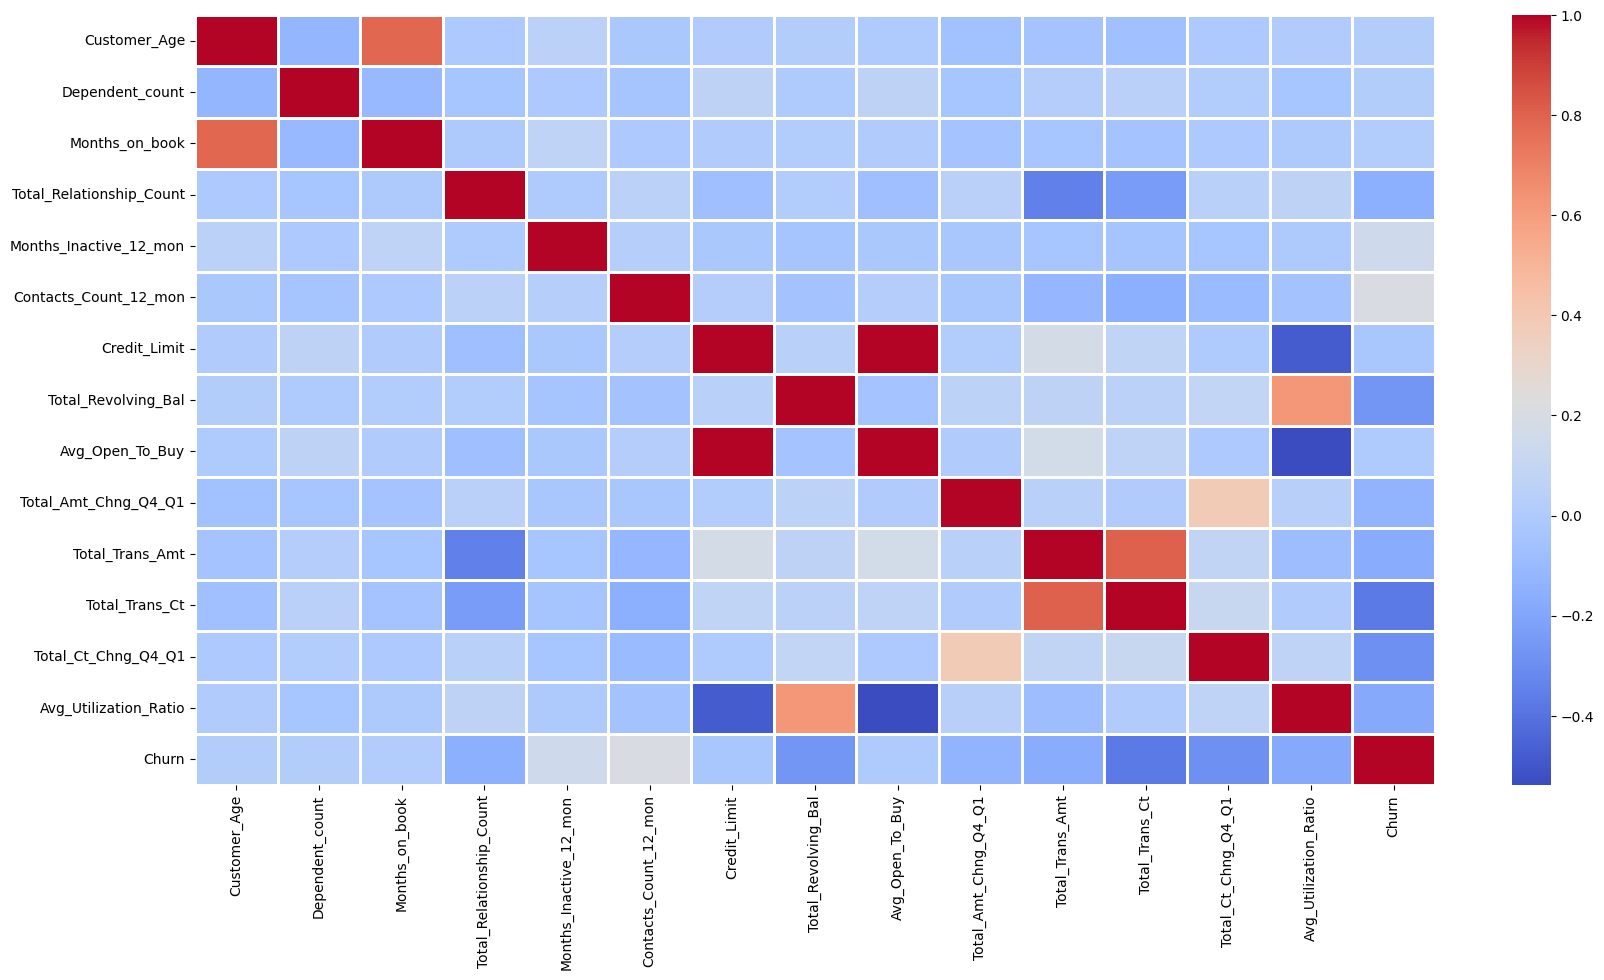

In [18]:
plt.figure(figsize= (20, 10))
df_num = df.select_dtypes(include= ['number'])
sns.heatmap(df_num.corr(), annot= False, cmap= 'coolwarm', linewidth= 2)
plt.show()

In [19]:
# gender_lst = []
# gender_groups = df[['Gender', 'Churn']].groupby('Gender').mean('Churn')
# for val in df['Gender']:
#     gender_lst.append(gender_groups.loc[val])

In [20]:
cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in cols:
    new_col_name = col + '_Churn'
    df[new_col_name] = df.groupby(col)['Churn'].transform('mean')

In [21]:
cols2keep = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
             'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
             'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
             'Gender_Churn', 'Education_Level_Churn', 'Marital_Status_Churn',
             'Income_Category_Churn', 'Card_Category_Churn']

X = df[cols2keep]
y = df['Churn']

In [22]:
X.shape

(10127, 19)

In [23]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.146152,0.152012,0.151269,0.134807,0.160979
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.173572,0.155691,0.169414,0.171862,0.160979
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.146152,0.155691,0.151269,0.157655,0.160979
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.173572,0.152012,0.172230,0.171862,0.160979
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.146152,0.159381,0.151269,0.134807,0.160979


In [24]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size= .3, random_state= 0)

## Base Model: Logistic Regression

In [25]:
clf_lr = LogisticRegression()

In [26]:
scaler = StandardScaler()
X_trn_scaled = scaler.fit_transform(X_trn)
X_tst_scaled = scaler.transform(X_tst)

clf_lr.fit(X_trn_scaled, y_trn)
preds_trn_lr = clf_lr.predict(X_trn_scaled)
preds_tst_lr = clf_lr.predict(X_tst_scaled)

In [27]:
print('logistic regression results:')
print('test results')
print(metrics.classification_report(y_tst, preds_tst_lr))

logistic regression results:
test results
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      2583
         1.0       0.72      0.60      0.65       456

    accuracy                           0.90      3039
   macro avg       0.82      0.78      0.80      3039
weighted avg       0.90      0.90      0.90      3039



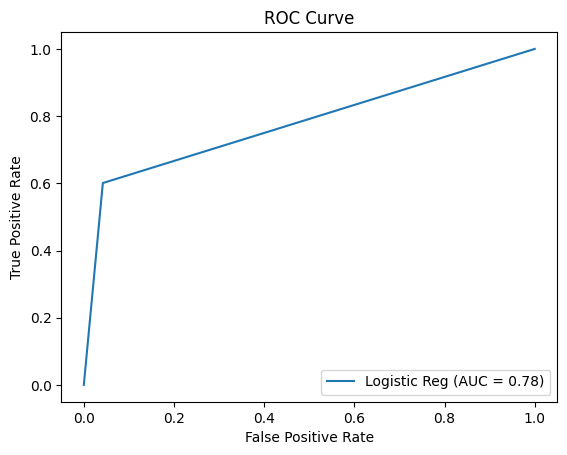

In [28]:
fpr, tpr, threshold = metrics.roc_curve(y_tst, preds_tst_lr)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr= fpr, tpr= tpr, roc_auc= roc_auc,
                                  estimator_name= 'Logistic Reg')
display.plot()
plt.title('ROC Curve')
plt.show()

In [29]:
#@TODO: Investigate why this doesn't work?!
#metrics.RocCurveDisplay.from_estimator(clf_lr, X_tst, y_tst)

## Random Forest

In [30]:
clf_rf = RandomForestClassifier(random_state= 0)